# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Data Loading and exploration

In [2]:
df = pd.read_csv(r"C:\Users\lakshya sikri\Downloads\SuperStoreOrders.csv")

In [3]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [4]:
df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014
51286,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014
51287,MX-2014-110527,31-12-2014,2/1/2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014
51288,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014
51289,CA-2014-156720,31-12-2014,4/1/2015,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3,3,0.2,-0.6048,0.17,Medium,2014


# ROWS AND COLUMNS OF DATASET

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

# Converting Data Types

In [6]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['ship_date'] = pd.to_datetime(df['ship_date'], errors='coerce')
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')

# Dealing With Missing Values

In [7]:
df.isnull().sum()

order_id              0
order_date        31223
ship_date         31456
ship_mode             0
customer_name         0
segment               0
state                 0
country               0
market                0
region                0
product_id            0
category              0
sub_category          0
product_name          0
sales              2630
quantity              0
discount              0
profit                0
shipping_cost         0
order_priority        0
year                  0
dtype: int64

In [8]:
# Convert `order_date` and `ship_date` to datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['ship_date'] = pd.to_datetime(df['ship_date'], errors='coerce')

# Convert `sales` to numeric
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')

# Check for remaining invalid data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      20067 non-null  datetime64[ns]
 2   ship_date       19834 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           48660 non-null  float64       
 15  qu

In [9]:
df['sales'].fillna(df['sales'].mean(), inplace=True)

In [10]:
total_missing = df.isnull().sum().sum()
print(f'Total missing values: {total_missing}')

Total missing values: 62679


# Duplicate rows

In [11]:
# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

# Drop duplicate rows
df = df.drop_duplicates()

# Confirm duplicates are removed
print("Duplicate rows after removal:", df.duplicated().sum())

Duplicate rows: 0
Duplicate rows after removal: 0


# Verify Data Quality

In [12]:
# Check for inconsistencies in important columns
df['state'].unique()
df['country'].unique()

# Handle inconsistent values (if any)
df['state'] = df['state'].str.strip().str.title()
df['country'] = df['country'].str.strip().str.title()

# Check again
df['state'].unique()
df['country'].unique()

array(['Algeria', 'Australia', 'Hungary', 'Sweden', 'Canada',
       'New Zealand', 'Iraq', 'Philippines', 'United Kingdom', 'Malaysia',
       'Guatemala', 'Iran', 'Thailand', 'Tanzania', 'Brazil', 'Mexico',
       'Cuba', 'France', 'United States', 'Japan', 'Sudan', 'Taiwan',
       'Indonesia', 'Vietnam', 'Angola', 'China', 'Mozambique', 'Lebanon',
       'Singapore', 'Netherlands', 'Nigeria', 'Egypt', 'Venezuela',
       'South Africa', 'Spain', 'India', 'Turkey', 'Austria', 'Italy',
       'Germany', 'Nicaragua', 'Dominican Republic', 'El Salvador',
       'Denmark', 'Saudi Arabia', 'Zambia', 'Myanmar (Burma)', 'Russia',
       'Mongolia', 'Belgium', 'Kenya', 'Colombia', 'Estonia',
       'Madagascar', 'Portugal', 'Morocco', 'Sierra Leone', 'Norway',
       'Central African Republic', 'Czech Republic', 'Benin',
       'Bangladesh', 'Panama', 'Chile', 'South Korea', 'Switzerland',
       'Moldova', 'Uganda', 'Zimbabwe', 'Niger', 'Senegal', 'Hong Kong',
       'Democratic Republic O

# Feature Transformation

# Min Max scaler

In [13]:
# Initialize scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

In [14]:
scaler = MinMaxScaler()

# Select columns to normalize
cols_to_normalize = ['sales', 'profit', 'shipping_cost', 'discount']
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# Confirm normalization
df[cols_to_normalize].describe()

,sales,profit,shipping_cost,discount
count,51290.000000,51290.000000,51290.000000,51290.000000
mean,0.161179,0.441909,0.028253,0.168127
std,0.196065,0.011628,0.061374,0.249741
min,0.000000,0.000000,0.000000,0.000000
25%,0.031031,0.440000,0.002796,0.000000
50%,0.085085,0.440616,0.008344,0.000000
75%,0.196196,0.442454,0.026190,0.235294
max,1.000000,1.000000,1.000000,1.000000


# Standard Scaler

In [15]:
scaler = StandardScaler()

# Select columns to standardize
cols_to_standardize = ['sales', 'profit', 'shipping_cost', 'discount']

# Perform standard scaling 
df[cols_to_standardize] = scaler.fit_transform(df[cols_to_standardize])
df[cols_to_standardize].describe()

,sales,profit,shipping_cost,discount
count,5.129000e+04,5.129000e+04,5.129000e+04,5.129000e+04
mean,7.591683e-17,3.316513e-16,-1.662412e-17,-4.156031e-17
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-8.220776e-01,-3.800326e+01,-4.603428e-01,-6.732098e-01
25%,-6.638069e-01,-1.642091e-01,-4.147901e-01,-6.732098e-01
50%,-3.881096e-01,-1.112342e-01,-3.243828e-01,-6.732098e-01
75%,1.786017e-01,4.683034e-02,-3.361329e-02,2.689515e-01
max,4.278324e+00,4.799460e+01,1.583340e+01,3.330976e+00


# Log Transformation

In [16]:
# Apply log transformation on sales and profit
df['log_sales'] = np.log1p(df['sales'])
df['log_profit'] = np.log1p(df['profit'])


C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

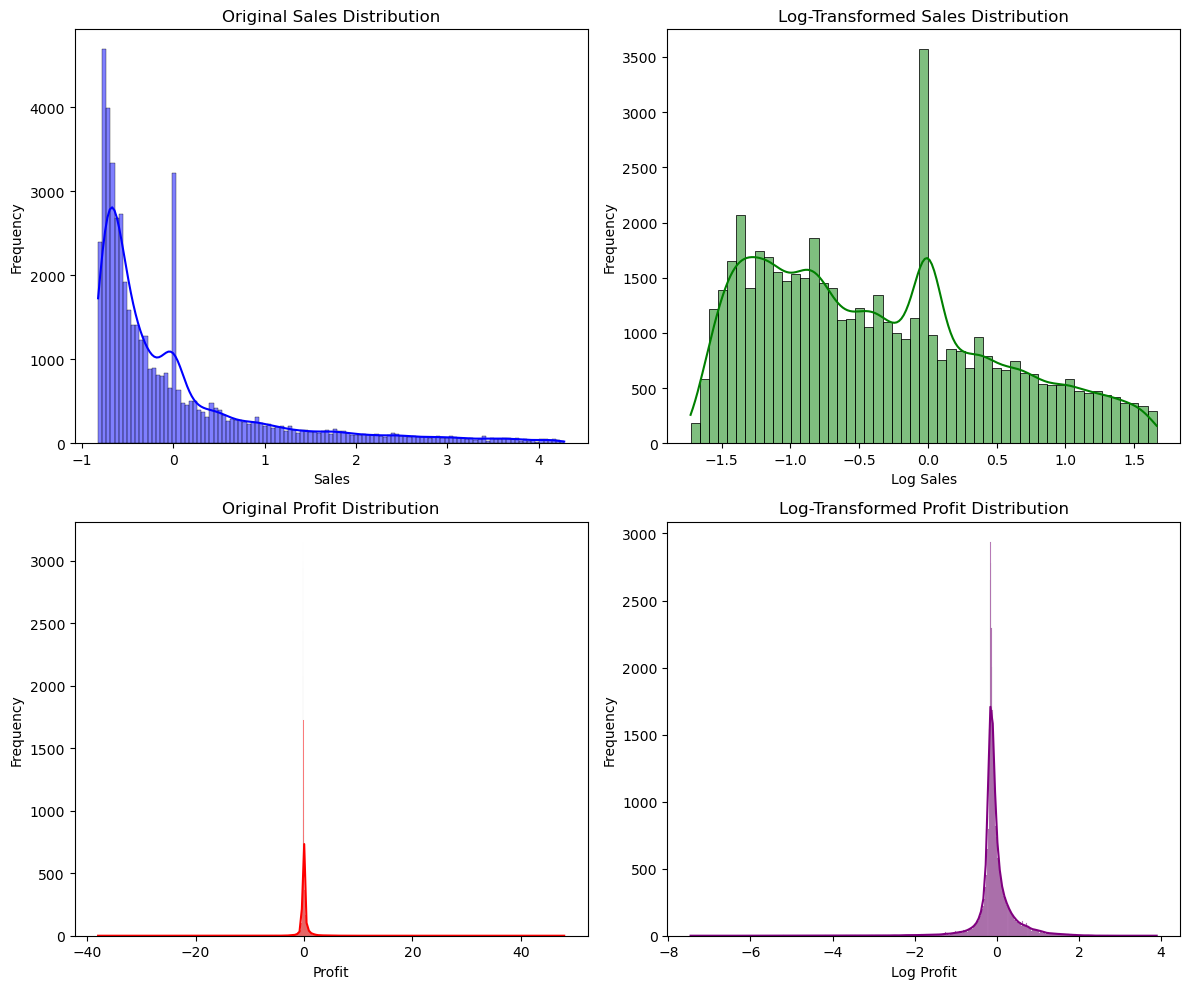

In [17]:
# Plot distributions before and after log transformation
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# sales distribution
sns.histplot(df['sales'], kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Original Sales Distribution')
axes[0, 0].set_xlabel('Sales')
axes[0, 0].set_ylabel('Frequency')

# Log-transformed sales
sns.histplot(df['log_sales'], kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Log-Transformed Sales Distribution')
axes[0, 1].set_xlabel('Log Sales')
axes[0, 1].set_ylabel('Frequency')

# profit distribution
sns.histplot(df['profit'], kde=True, ax=axes[1, 0], color='red')
axes[1, 0].set_title('Original Profit Distribution')
axes[1, 0].set_xlabel('Profit')
axes[1, 0].set_ylabel('Frequency')

# Log-transformed profit
sns.histplot(df['log_profit'], kde=True, ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Log-Transformed Profit Distribution')
axes[1, 1].set_xlabel('Log Profit')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Reduces skewness in sales and profit for better model performance.

# Frequency Encoding on sub_category

In [18]:
sub_category_freq = df['sub_category'].value_counts()
df['sub_category_frequency'] = df['sub_category'].apply(lambda x: sub_category_freq[x])
df[['sub_category', 'sub_category_frequency']].head()

,sub_category,sub_category_frequency
0,Storage,5059
1,Supplies,2425
2,Storage,5059
3,Paper,3538
4,Furnishings,3170


This technique assigns a count of how many times each category appears in the dataset.

# Mean Encoding on sub_category for sales

In [19]:
df['sub_category_mean_sales'] = df.groupby('sub_category')['sales'].transform('mean')
df[['sub_category', 'sales', 'sub_category_mean_sales']].head()

,sub_category,sales,sub_category_mean_sales
0,Storage,1.260969,0.125169
1,Supplies,-0.209417,-0.377094
2,Storage,-0.485114,0.125169
3,Paper,-0.592330,-0.469531
4,Furnishings,-0.240050,-0.212382


 It assigns the average sales for sub-category on Dataset.

# Frequency Encoding: ship_mode and segment

In [20]:
df['ship_mode_segment'] = df['ship_mode'] + '_' + df['segment']
ship_mode_segment_freq = df['ship_mode_segment'].value_counts()
df['ship_mode_segment_frequency'] = df['ship_mode_segment'].apply(lambda x: ship_mode_segment_freq[x])
df[['ship_mode', 'segment', 'ship_mode_segment', 'ship_mode_segment_frequency']].head()

,ship_mode,segment,ship_mode_segment,ship_mode_segment_frequency
0,Standard Class,Consumer,Standard Class_Consumer,15876
1,Standard Class,Consumer,Standard Class_Consumer,15876
2,Second Class,Consumer,Second Class_Consumer,5257
3,Second Class,Home Office,Second Class_Home Office,1854
4,Standard Class,Consumer,Standard Class_Consumer,15876


For the frequency encoding, we’ll combine multiple categorical columns to get a richer feature. Instead of just encoding ship_mode, we can create a joint frequency encoding using ship_mode and segment. This can capture the combination of how often each ship_mode appears within different segments.

# Mean Encoding: region and category based on sales

In [21]:
df['region_category'] = df['region'] + '_' + df['category']
region_category_mean_sales = df.groupby('region_category')['sales'].mean()
df['region_category_mean_sales'] = df['region_category'].map(region_category_mean_sales)
df[['region', 'category', 'region_category', 'sales', 'region_category_mean_sales']].head()

,region,category,region_category,sales,region_category_mean_sales
0,Africa,Office Supplies,Africa_Office Supplies,1.260969,-0.436493
1,Oceania,Office Supplies,Oceania_Office Supplies,-0.209417,-0.302793
2,EMEA,Office Supplies,EMEA_Office Supplies,-0.485114,-0.463547
3,North,Office Supplies,North_Office Supplies,-0.592330,-0.310161
4,Oceania,Furniture,Oceania_Furniture,-0.240050,0.686111


For mean encoding, we’ll calculate the mean of sales based on a combination of region and category. This way, we account for both the geographical and product-related aspects when understanding average sales, which provides a more nuanced feature than encoding by just one column.

# One-Hot Encoding

In [22]:
# One-Hot Encoding on selected categorical columns
encoded_df = pd.get_dummies(df, columns=['ship_mode', 'segment', 'region', 'category', 'sub_category'], drop_first=True)

# Check new columns after encoding
encoded_df.head()

,order_id,order_date,ship_date,customer_name,state,country,market,product_id,product_name,sales,...,sub_category_Envelopes,sub_category_Fasteners,sub_category_Furnishings,sub_category_Labels,sub_category_Machines,sub_category_Paper,sub_category_Phones,sub_category_Storage,sub_category_Supplies,sub_category_Tables
0,AG-2011-2040,2011-01-01,2011-06-01,Toby Braunhardt,Constantine,Algeria,Africa,OFF-TEN-10000025,"Tenex Lockers, Blue",1.260969,...,False,False,False,False,False,False,False,True,False,False
1,IN-2011-47883,2011-01-01,2011-08-01,Joseph Holt,New South Wales,Australia,APAC,OFF-SU-10000618,"Acme Trimmer, High Speed",-0.209417,...,False,False,False,False,False,False,False,False,True,False
2,HU-2011-1220,2011-01-01,2011-05-01,Annie Thurman,Budapest,Hungary,EMEA,OFF-TEN-10001585,"Tenex Box, Single Width",-0.485114,...,False,False,False,False,False,False,False,True,False,False
3,IT-2011-3647632,2011-01-01,2011-05-01,Eugene Moren,Stockholm,Sweden,EU,OFF-PA-10001492,"Enermax Note Cards, Premium",-0.592330,...,False,False,False,False,False,True,False,False,False,False
4,IN-2011-47883,2011-01-01,2011-08-01,Joseph Holt,New South Wales,Australia,APAC,FUR-FU-10003447,"Eldon Light Bulb, Duo Pack",-0.240050,...,False,False,True,False,False,False,False,False,False,False


# Label Encoding

In [23]:
label_encoder = LabelEncoder()

# Encode specific columns
df['order_priority_encoded'] = label_encoder.fit_transform(df['order_priority'])

dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Verify the encoding
df[['order_priority', 'order_priority_encoded']].head()

,order_priority,order_priority_encoded
0,Medium,3
1,Medium,3
2,High,1
3,High,1
4,Medium,3


# Target Encoding

In [24]:
# Perform target encoding for market based on average profit
market_target_encoding = df.groupby('market')['profit'].mean().to_dict()
df['market_target_encoded'] = df['market'].map(market_target_encoding)

# Verify target encoding
df[['market', 'market_target_encoded']].head()

,market,market_target_encoded
0,Africa,-0.053130
1,APAC,0.063815
2,EMEA,-0.114164
3,EU,0.049542
4,APAC,0.063815
